In [1]:
#installs

!pip install emoji
!pip install bokeh 
!pip install pandas-bokeh


#imports 
import emoji
import datetime
import numpy as np 
from math import pi
import pandas_bokeh
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
from bokeh.plotting import figure, output_file, show 
from bokeh.models import ColumnDataSource, HoverTool, LinearAxis, Range1d, FactorRange
from bokeh.themes import built_in_themes
from bokeh.transform import cumsum
from bokeh.palettes import Viridis
pandas_bokeh.output_notebook()
from bokeh.io import curdoc
%matplotlib inline



Loading BokehJS ...

Moon phase Data 

In [2]:
docs_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv"

### read only date and phase columns from weather csv 

columns = ["datetime", "moonphase"]
moon_cal_file_id = "1riSSdrBXk3TcYI3rB0WDo4tAbNJh3dbtR5lepmlSIBs"
moon_cal = pd.read_csv(
    docs_url.format(moon_cal_file_id),
    usecols=columns
)
moon_cal.head()

datetime  moonphase
0  2017-01-01       0.05
1  2017-01-02       0.09
2  2017-01-03       0.13
3  2017-01-04       0.18
4  2017-01-05       0.23

In [3]:
### add new column to df with words using weather data

# 0 – new moon
# 0-0.25 – waxing crescent
# 0.25 – first quarter
# 0.25-0.5 – waxing gibbous
# 0.5 – full moon
# 0.5-0.75 – waning gibbous
# 0.75 – last quarter
# 0.75 -1 – waning crescent 

conditions = [
   (moon_cal['moonphase'] == 0.0),                                           #new moon
   (moon_cal['moonphase'] >  0) & (moon_cal['moonphase'] < 0.25),            #waxing crescent 
   (moon_cal['moonphase'] == 0.25),                                          ##first quarter
   (moon_cal['moonphase'] >  0.25) & (moon_cal['moonphase'] <= 0.49),        #waxing gibbous
   (moon_cal['moonphase'] == 0.5),                                           #full moon
   (moon_cal['moonphase'] >= 0.51) & (moon_cal['moonphase'] <= 0.75),        #waning gibbous
   (moon_cal['moonphase'] == 0.75),                                          #last quarter 
   (moon_cal['moonphase'] > 0.75) & (moon_cal['moonphase'] <= 1.0),          #waning crescent
   ]

values = [
   'new moon',
   'waxing crescent',
   'first quarter',
   'waxing gibbous',
   'full moon',
   'waning gibbous',
   'last quarter',
   'waning crescent'
   ]

moon_cal['phase_name'] = np.select(conditions, values)

moon_cal.head()

datetime  moonphase       phase_name
0  2017-01-01       0.05  waxing crescent
1  2017-01-02       0.09  waxing crescent
2  2017-01-03       0.13  waxing crescent
3  2017-01-04       0.18  waxing crescent
4  2017-01-05       0.23  waxing crescent

In [4]:
### add new column to df with simplified phases 

con = [
    (moon_cal['phase_name'] == 'new moon'),             # new
    (moon_cal['phase_name'] == 'waxing crescent'),      # waxing cr
    (moon_cal['phase_name'] == 'first quarter'),        # first q
    (moon_cal['phase_name'] == 'waxing gibbous'),       # wax gib
    (moon_cal['phase_name'] == 'full moon'),            # full 
    (moon_cal['phase_name'] == 'waning gibbous'),       # wan gib
    (moon_cal['phase_name'] == 'last quarter'),         # last q 
    (moon_cal['phase_name'] == 'waning crescent')       # wan cr
    ]


val = [
    'new moon',
    'crescent',
    'quarter',
    'gibbous',
    'full moon',
    'gibbous',
    'quarter',
    'crescent'
    ]

moon_cal['simple_phase'] = np.select(con, val)

moon_cal.head()

datetime  moonphase       phase_name simple_phase
0  2017-01-01       0.05  waxing crescent     crescent
1  2017-01-02       0.09  waxing crescent     crescent
2  2017-01-03       0.13  waxing crescent     crescent
3  2017-01-04       0.18  waxing crescent     crescent
4  2017-01-05       0.23  waxing crescent     crescent

In [5]:
### add new column to df with emojis 

cons = [
    (moon_cal['phase_name'] == 'new moon'),
    (moon_cal['phase_name'] == 'waxing crescent'),   
    (moon_cal['phase_name'] == 'first quarter'),
    (moon_cal['phase_name'] == 'waxing gibbous'),
    (moon_cal['phase_name'] == 'full moon'),
    (moon_cal['phase_name'] == 'waning gibbous'),
    (moon_cal['phase_name'] == 'last quarter'),
    (moon_cal['phase_name'] == 'waning crescent')
    ]

vals = [
    emoji.emojize(":new_moon:"),
    emoji.emojize(":waxing_crescent_moon:"),
    emoji.emojize(":first_quarter_moon:"), 
    emoji.emojize(":waxing_gibbous_moon:"),
    emoji.emojize(":full_moon:"),
    emoji.emojize(":waning_gibbous_moon:"), 
    emoji.emojize(":last_quarter_moon:"),
    emoji.emojize(":waning_crescent_moon:")
    ]

moon_cal['emoji'] = np.select(cons, vals)

moon_cal.head(31)

datetime  moonphase       phase_name simple_phase emoji
0   2017-01-01       0.05  waxing crescent     crescent     🌒
1   2017-01-02       0.09  waxing crescent     crescent     🌒
2   2017-01-03       0.13  waxing crescent     crescent     🌒
3   2017-01-04       0.18  waxing crescent     crescent     🌒
4   2017-01-05       0.23  waxing crescent     crescent     🌒
5   2017-01-06       0.28   waxing gibbous      gibbous     🌔
6   2017-01-07       0.35   waxing gibbous      gibbous     🌔
7   2017-01-08       0.40   waxing gibbous      gibbous     🌔
8   2017-01-09       0.44   waxing gibbous      gibbous     🌔
9   2017-01-10       0.47   waxing gibbous      gibbous     🌔
10  2017-01-11       0.49   waxing gibbous      gibbous     🌔
11  2017-01-12       0.50        full moon    full moon     🌕
12  2017-01-13       0.51   waning gibbous      gibbous     🌖
13  2017-01-14       0.53   waning gibbous      gibbous     🌖
14  2017-01-15       0.56   waning gibbous      gibbous     🌖
15  2017-01-16       0.60   waning gibbous      gibbous     🌖
16  2017-01-17       0.64   waning gibbous      gibbous     🌖
17  2017-01-18       0.69   waning gibbous      gibbous     🌖
18  2017-01-19       0.73   waning gibbous      gibbous     🌖
19  2017-01-20       0.78  waning crescent     crescent     🌘
20  2017-01-21       0.83  waning crescent     crescent     🌘
21  2017-01-22       0.87  waning crescent     crescent     🌘
22  2017-01-23       0.91  waning crescent     crescent     🌘
23  2017-01-24       0.95  waning crescent     crescent     🌘
24  2017-01-25       0.97  waning crescent     crescent     🌘
25  2017-01-26       0.99  waning crescent     crescent     🌘
26  2017-01-27       1.00  waning crescent     crescent     🌘
27  2017-01-28       0.00         new moon     new moon     🌑
28  2017-01-29       0.01  waxing crescent     crescent     🌒
29  2017-01-30       0.03  waxing crescent     crescent     🌒
30  2017-01-31       0.07  waxing crescent     crescent     🌒

In [6]:
#Change date to datetime type

moon_cal['datetime'] = pd.to_datetime(moon_cal['datetime'])

In [7]:
#save as moon csv 
#update this file path to save moon_phase csv to your preferred location

#moon_cal.to_csv(r'/Users/tifanyables/Desktop/LunarEffect/moon_cal.csv', index=False)

#moon_cal.to_csv('moon_cal.csv', index = False, encoding = 'utf-8-sig') 
#files.download('moon_cal.csv')

#moon_cal.to_csv('/content/drive/MyDrive/moon_cal.csv')

NEISS Data 

In [8]:
neiss_id = "1BU2esUk_-grrUXMLrEEzPf1hlsJcKlgzJjl9Qs23ee0"
#NEISS Data for 2017-2021 
AllYearsNEISS = pd.read_csv(docs_url.format(neiss_id))

In [9]:
AllYearsNEISS.shape

(57635, 25)

In [10]:
AllYearsNEISS.dtypes

CPSC_Case_Number     float64
Treatment_Date        object
Age                    int64
Sex                  float64
Race                 float64
Other_Race            object
Hispanic             float64
Body_Part            float64
Diagnosis            float64
Other_Diagnosis       object
Body_Part_2          float64
Diagnosis_2          float64
Other_Diagnosis_2     object
Disposition          float64
Location             float64
Fire_Involvement     float64
Alcohol              float64
Drug                 float64
Product_1            float64
Product_2            float64
Product_3            float64
Narrative             object
Stratum               object
PSU                  float64
Weight               float64
dtype: object

In [11]:
print(AllYearsNEISS.columns)

Index(['CPSC_Case_Number', 'Treatment_Date', 'Age', 'Sex', 'Race',
       'Other_Race', 'Hispanic', 'Body_Part', 'Diagnosis', 'Other_Diagnosis',
       'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'Disposition',
       'Location', 'Fire_Involvement', 'Alcohol', 'Drug', 'Product_1',
       'Product_2', 'Product_3', 'Narrative', 'Stratum', 'PSU', 'Weight'],
      dtype='object')


In [12]:
#drop some columns, I guess 
AllYearsNEISS.drop(
    ["Stratum", "PSU", "Weight", "CPSC_Case_Number", "Race", "Other_Race", "Hispanic"],
    axis = 1,
    inplace = True
    )

In [13]:
#Product codes and titles data
df_products = pd.read_csv("https://docs.google.com/spreadsheets/d/1tR7eoVbPkIWgCHgUYxsKLANw_0l0v129V50cqsOtf-g/gviz/tq?tqx=out:csv")
df_products.dropna(axis='columns', how='all', inplace=True)
df_products.head()

Code                                      Product Title
0   234                 Toasters (excluding toaster ovens)
1   270                                       Ice crushers
2   274                                   Ice cream makers
3   413                                   Waste containers
4   480  Manual cleaning equipment (excluding buckets o...

In [14]:
#merge NEISS df and product df 
product_df_all = pd.merge(AllYearsNEISS, df_products, how='outer', left_on=['Product_1'], right_on=['Code'])

In [15]:
product_df_all.head()

Treatment_Date   Age  Sex  Body_Part  Diagnosis Other_Diagnosis  \
0     01/02/2017   9.0  2.0       88.0       56.0             NaN   
1     01/01/2017  14.0  1.0       83.0       56.0             NaN   
2     01/14/2017  81.0  2.0       83.0       56.0             NaN   
3     01/12/2017  16.0  1.0        0.0       41.0             NaN   
4     01/16/2017  34.0  1.0        0.0       41.0             NaN   

   Body_Part_2  Diagnosis_2 Other_Diagnosis_2  Disposition  Location  \
0          NaN          NaN               NaN          1.0       1.0   
1          NaN          NaN               NaN          1.0       1.0   
2          NaN          NaN               NaN          1.0       1.0   
3          NaN          NaN               NaN          1.0       1.0   
4          NaN          NaN               NaN          1.0       0.0   

   Fire_Involvement  Alcohol  Drug  Product_1  Product_2  Product_3  \
0               0.0      NaN   NaN      431.0        0.0        0.0   
1               0.0      NaN   NaN      431.0      676.0        0.0   
2               0.0      NaN   NaN      431.0     4057.0        0.0   
3               0.0      NaN   NaN      431.0        0.0        0.0   
4               0.0      NaN   NaN      431.0        0.0        0.0   

                                           Narrative   Code  \
0  9 YOF STUCK A TOOTHPICK IN HER TOOTH AND COULD...  431.0   
1  14YOM C/O FOOT PAIN AFTER STEPPING ON SOMETHIN...  431.0   
2  81YOF STEPPED ON A TOOTHPICK THAT HAD FALLEN O...  431.0   
3  16YOM SWALLOWED PIECE OF TOOTHPICK; DX FB INGE...  431.0   
4                        34YOM SWALLOWED A TOOTHPICK  431.0   

                       Product Title  
0  Toothpicks or hor d'oeuvres picks  
1  Toothpicks or hor d'oeuvres picks  
2  Toothpicks or hor d'oeuvres picks  
3  Toothpicks or hor d'oeuvres picks  
4  Toothpicks or hor d'oeuvres picks

In [16]:
#drop unnecessary columns 

product_df_all.drop(["Other_Diagnosis", "Body_Part_2", "Diagnosis_2", "Other_Diagnosis_2", "Product_2", "Product_3", "Product_1", "Code"], axis = 1, inplace = True)
product_df_all.head()

Treatment_Date   Age  Sex  Body_Part  Diagnosis  Disposition  Location  \
0     01/02/2017   9.0  2.0       88.0       56.0          1.0       1.0   
1     01/01/2017  14.0  1.0       83.0       56.0          1.0       1.0   
2     01/14/2017  81.0  2.0       83.0       56.0          1.0       1.0   
3     01/12/2017  16.0  1.0        0.0       41.0          1.0       1.0   
4     01/16/2017  34.0  1.0        0.0       41.0          1.0       0.0   

   Fire_Involvement  Alcohol  Drug  \
0               0.0      NaN   NaN   
1               0.0      NaN   NaN   
2               0.0      NaN   NaN   
3               0.0      NaN   NaN   
4               0.0      NaN   NaN   

                                           Narrative  \
0  9 YOF STUCK A TOOTHPICK IN HER TOOTH AND COULD...   
1  14YOM C/O FOOT PAIN AFTER STEPPING ON SOMETHIN...   
2  81YOF STEPPED ON A TOOTHPICK THAT HAD FALLEN O...   
3  16YOM SWALLOWED PIECE OF TOOTHPICK; DX FB INGE...   
4                        34YOM SWALLOWED A TOOTHPICK   

                       Product Title  
0  Toothpicks or hor d'oeuvres picks  
1  Toothpicks or hor d'oeuvres picks  
2  Toothpicks or hor d'oeuvres picks  
3  Toothpicks or hor d'oeuvres picks  
4  Toothpicks or hor d'oeuvres picks

In [17]:
###only keep foreign body diagnoses in all years
#41 - Ingestion
#42 - Aspiration 
#56 - Foreign Body 
allyears_fb = product_df_all[ (product_df_all['Diagnosis'] == 56) | (product_df_all['Diagnosis'] == 41) | (product_df_all['Diagnosis'] == 42) ]
allyears_fb.head()

Treatment_Date   Age  Sex  Body_Part  Diagnosis  Disposition  Location  \
0     01/02/2017   9.0  2.0       88.0       56.0          1.0       1.0   
1     01/01/2017  14.0  1.0       83.0       56.0          1.0       1.0   
2     01/14/2017  81.0  2.0       83.0       56.0          1.0       1.0   
3     01/12/2017  16.0  1.0        0.0       41.0          1.0       1.0   
4     01/16/2017  34.0  1.0        0.0       41.0          1.0       0.0   

   Fire_Involvement  Alcohol  Drug  \
0               0.0      NaN   NaN   
1               0.0      NaN   NaN   
2               0.0      NaN   NaN   
3               0.0      NaN   NaN   
4               0.0      NaN   NaN   

                                           Narrative  \
0  9 YOF STUCK A TOOTHPICK IN HER TOOTH AND COULD...   
1  14YOM C/O FOOT PAIN AFTER STEPPING ON SOMETHIN...   
2  81YOF STEPPED ON A TOOTHPICK THAT HAD FALLEN O...   
3  16YOM SWALLOWED PIECE OF TOOTHPICK; DX FB INGE...   
4                        34YOM SWALLOWED A TOOTHPICK   

                       Product Title  
0  Toothpicks or hor d'oeuvres picks  
1  Toothpicks or hor d'oeuvres picks  
2  Toothpicks or hor d'oeuvres picks  
3  Toothpicks or hor d'oeuvres picks  
4  Toothpicks or hor d'oeuvres picks

In [18]:
#Change treatment date to datetime type

allyears_fb['Treatment_Date'] = pd.to_datetime(allyears_fb['Treatment_Date'])

/var/folders/lf/n1rw9kdd3csgtpmvzst_92pr0000gn/T/ipykernel_61494/2449918701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allyears_fb['Treatment_Date'] = pd.to_datetime(allyears_fb['Treatment_Date'])


In [19]:
#Check to make sure only foreign body related diagnoses remain 
allyears_fb['Diagnosis'].value_counts()

56.0    35442
41.0    17591
42.0     2621
Name: Diagnosis, dtype: int64

In [20]:
#Check out 25 most common products in df 
allyears_fb['Product Title'].value_counts().head(25)

Jewelry (excluding watches)                                                   13401
Coins                                                                          6668
Fishing (activity                                                              3153
Paper products (excluding bags                                                 1702
Batteries                                                                      1661
Toys                                                                           1605
Building sets                                                                  1598
Nails                                                                          1454
Pens and pencils                                                               1026
Kitchen gadgets                                                                 854
Desk supplies (excluding pens and pencils)                                      842
Stereo or hi-fi components or accessories (excluding self-contained units)  

In [21]:
#sex of pt 1-male, 2-female, 0-not recorded 
allyears_fb['Sex'].value_counts()

1.0    29405
2.0    26246
0.0        3
Name: Sex, dtype: int64

In [22]:
#Alcohol involvement 1-yes, 0-no
allyears_fb['Alcohol'].value_counts()

0.0    33617
1.0       81
Name: Alcohol, dtype: int64

In [23]:
#drug involvement 1-yes, 0-no
allyears_fb['Drug'].value_counts()

0.0    33494
1.0      204
Name: Drug, dtype: int64

In [24]:
#location where incident occurred
allyears_fb['Location'].value_counts()

0.0    26011
1.0    24485
9.0     2252
8.0     1572
5.0     1198
4.0      123
2.0       11
7.0        1
6.0        1
Name: Location, dtype: int64

In [25]:
#status of patient after ED visit
allyears_fb['Disposition'].value_counts()

1.0    50327
4.0     3245
6.0     1126
2.0      604
5.0      345
8.0        5
9.0        2
Name: Disposition, dtype: int64

In [26]:
#was fire involved? 
#0-no
#1-yes with fire dept involvement
#2-yes without fire dept involvement
#3-yes, unknown fire dept involvement 

allyears_fb['Fire_Involvement'].value_counts()

0.0    55637
3.0        7
2.0        6
1.0        4
Name: Fire_Involvement, dtype: int64

In [27]:
#count of body part involvement  
allyears_fb['Body_Part'].value_counts()

0.0     20212
94.0    10594
76.0     7108
92.0     5513
77.0     3531
83.0     2707
82.0     1410
79.0      982
88.0      608
38.0      548
36.0      423
93.0      423
33.0      373
81.0      232
31.0      216
35.0      186
75.0      182
80.0      107
34.0       94
89.0       74
37.0       45
30.0       44
32.0       36
87.0        5
85.0        1
Name: Body_Part, dtype: int64

In [28]:
#body part dict 

body_dict =  {0 : 'internal', 94 : 'ear', 76 : 'face (including nose)', 92 : 'finger', 77 : 'eyeball', 83 : 'foot', 
              82 : 'hand', 79 : 'lower trunk', 88 : 'mouth', 38 : 'pubic region', 36 : 'lower leg', 93 : 'toe', 33 : 'lower arm', 
              31 : 'upper trunk', 81 : 'upper leg', 75 : 'head', 35 : 'knee', 85 : 'all body parts', 34 : 'wrist', 80 : 'upper arm', 
              89 : 'neck', 32 : 'elbow', 30 : 'shoulder', 37 : 'ankle', 87 : 'not stated/unknown'
              }


In [29]:
#add body part name to df 
allyears_fb['Body_Part_Name']= allyears_fb['Body_Part'].map(body_dict)

/var/folders/lf/n1rw9kdd3csgtpmvzst_92pr0000gn/T/ipykernel_61494/713750066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allyears_fb['Body_Part_Name']= allyears_fb['Body_Part'].map(body_dict)


In [30]:
allyears_fb.head()

Treatment_Date   Age  Sex  Body_Part  Diagnosis  Disposition  Location  \
0     2017-01-02   9.0  2.0       88.0       56.0          1.0       1.0   
1     2017-01-01  14.0  1.0       83.0       56.0          1.0       1.0   
2     2017-01-14  81.0  2.0       83.0       56.0          1.0       1.0   
3     2017-01-12  16.0  1.0        0.0       41.0          1.0       1.0   
4     2017-01-16  34.0  1.0        0.0       41.0          1.0       0.0   

   Fire_Involvement  Alcohol  Drug  \
0               0.0      NaN   NaN   
1               0.0      NaN   NaN   
2               0.0      NaN   NaN   
3               0.0      NaN   NaN   
4               0.0      NaN   NaN   

                                           Narrative  \
0  9 YOF STUCK A TOOTHPICK IN HER TOOTH AND COULD...   
1  14YOM C/O FOOT PAIN AFTER STEPPING ON SOMETHIN...   
2  81YOF STEPPED ON A TOOTHPICK THAT HAD FALLEN O...   
3  16YOM SWALLOWED PIECE OF TOOTHPICK; DX FB INGE...   
4                        34YOM SWALLOWED A TOOTHPICK   

                       Product Title Body_Part_Name  
0  Toothpicks or hor d'oeuvres picks          mouth  
1  Toothpicks or hor d'oeuvres picks           foot  
2  Toothpicks or hor d'oeuvres picks           foot  
3  Toothpicks or hor d'oeuvres picks       internal  
4  Toothpicks or hor d'oeuvres picks       internal

In [31]:
allyears_fb.shape

(55654, 13)

In [32]:
#merge moon df and foreign body df 
foreignbody_moon = pd.merge(allyears_fb, moon_cal, how='outer', left_on=['Treatment_Date'], right_on=['datetime'])
foreignbody_moon.head()

Treatment_Date    Age  Sex  Body_Part  Diagnosis  Disposition  Location  \
0     2017-01-02    9.0  2.0       88.0       56.0          1.0       1.0   
1     2017-01-02    6.0  1.0        0.0       41.0          4.0       0.0   
2     2017-01-02    4.0  2.0        0.0       41.0          1.0       1.0   
3     2017-01-02  220.0  1.0       31.0       56.0          1.0       1.0   
4     2017-01-02    3.0  1.0        0.0       41.0          4.0       0.0   

   Fire_Involvement  Alcohol  Drug  \
0               0.0      NaN   NaN   
1               0.0      NaN   NaN   
2               0.0      NaN   NaN   
3               0.0      NaN   NaN   
4               0.0      NaN   NaN   

                                           Narrative  \
0  9 YOF STUCK A TOOTHPICK IN HER TOOTH AND COULD...   
1  6YOM WAS READING/WRITING WHEN HE FLIPPED A COI...   
2  4 YO F PER MOM PT SWALLOWED A COINDX INGESTED ...   
3  20 MOM BROUGHT IN FOR AN EVAL FOR POSS FB - PT...   
4  3 YO M SWALLOWED A COIN AND HAS BEEN DROOLING;...   

                       Product Title Body_Part_Name   datetime  moonphase  \
0  Toothpicks or hor d'oeuvres picks          mouth 2017-01-02       0.09   
1                              Coins       internal 2017-01-02       0.09   
2                              Coins       internal 2017-01-02       0.09   
3                              Coins    upper trunk 2017-01-02       0.09   
4                              Coins       internal 2017-01-02       0.09   

        phase_name simple_phase emoji  
0  waxing crescent     crescent     🌒  
1  waxing crescent     crescent     🌒  
2  waxing crescent     crescent     🌒  
3  waxing crescent     crescent     🌒  
4  waxing crescent     crescent     🌒

In [33]:
#foreignbody_moon.shape

In [34]:
#groupby treatment dates to get count of visits for each day 

daygroup = foreignbody_moon.groupby(["Treatment_Date"])['Treatment_Date'].count().reset_index(name="Count")

In [35]:
daygroup.head()

Treatment_Date  Count
0     2017-01-01     24
1     2017-01-02     41
2     2017-01-03     29
3     2017-01-04     26
4     2017-01-05     28

In [36]:
#check to make sure count is accurate 
daygroup['Count'].sum()

55654

In [37]:
#merge daygroup and foreign body - moon phase dfs for a bokeh chart  
maybe = pd.merge(daygroup, foreignbody_moon, how='outer', left_on=['Treatment_Date'], right_on=['datetime'])

In [38]:
#drop unneeded columns 
maybe.drop(["Treatment_Date_y", "Age", "Sex", "Body_Part", "Diagnosis", "Disposition", "Location", "Fire_Involvement", "Alcohol", "Drug", "Narrative", "Product Title", "phase_name"], axis = 1, inplace = True)


In [39]:
#make a simplified 0-1 scale for moonphase by moon brightness

dictphase = {'new moon' : 0, 'crescent' : 0.25, 'quarter' : 0.5, 'gibbous' : 0.75, 'full moon' : 1}

In [40]:
#add simplified scale to df 
maybe['number']= maybe['simple_phase'].map(dictphase)

In [41]:
maybe.shape

(55654, 8)

In [42]:
maybe.columns 

Index(['Treatment_Date_x', 'Count', 'Body_Part_Name', 'datetime', 'moonphase',
       'simple_phase', 'emoji', 'number'],
      dtype='object')

Bokeh Visuals

In [43]:
###set theme for chart  

curdoc().theme = 'night_sky'
### columns used for vis
x = maybe["datetime"]
y1 = maybe["Count"]

### start building visualization

source = ColumnDataSource(maybe)

p = figure(x_axis_type='datetime', sizing_mode="stretch_width",
           title = 'Foreign Body Incidents and Moon Phase 2017-2021'
           )

#p = figure(x_axis_type='datetime', sizing_mode="stretch_width",
#           title = 'Foreign Body Incidents and Moon Phase 2017-2021',tools=TOOLS, toolbar_location='below',
#           tooltips=[("date", "@datetime"), ("count", " $y")])

p = figure(x_axis_type='datetime', sizing_mode="stretch_width",
           title = 'Foreign Body Incidents and Moon Phase 2017-2021'
           )

#y axis for treatment count 
p.y_range = Range1d(start=0, end=65)

#add extra y axis for moon phase 
p.extra_y_ranges["number"] = Range1d(start=0, end=1)
p.add_layout(LinearAxis(y_range_name='number', axis_label='Moon Phase'), 'right')
#add lines 
p.line(x, y1, line_width=1, legend_label='Foreign Body Incidents 2017-2021', color ='aqua')
p.line(maybe.datetime, maybe.number, y_range_name="number", line_width=1, color="purple", legend_label= "Moon Phase")

show(p)

Some spikes do appear on full moon days. How common is it, though? 

In [44]:
###Count of incidents by simplified moon phase 

In [45]:
#new moon 
foreignbody_moon.loc[foreignbody_moon['simple_phase'] == 'new moon'].count()

Treatment_Date      1836
Age                 1836
Sex                 1836
Body_Part           1836
Diagnosis           1836
Disposition         1836
Location            1836
Fire_Involvement    1836
Alcohol             1185
Drug                1185
Narrative           1836
Product Title       1835
Body_Part_Name      1836
datetime            1836
moonphase           1836
phase_name          1836
simple_phase        1836
emoji               1836
dtype: int64

In [46]:
#crescent moon 
foreignbody_moon.loc[foreignbody_moon['simple_phase'] == 'crescent'].count()

Treatment_Date      25584
Age                 25584
Sex                 25584
Body_Part           25584
Diagnosis           25584
Disposition         25584
Location            25584
Fire_Involvement    25584
Alcohol             15586
Drug                15586
Narrative           25584
Product Title       25579
Body_Part_Name      25584
datetime            25584
moonphase           25584
phase_name          25584
simple_phase        25584
emoji               25584
dtype: int64

In [47]:
#quarter moon
foreignbody_moon.loc[foreignbody_moon['simple_phase'] == 'quarter'].count()

Treatment_Date      425
Age                 425
Sex                 425
Body_Part           425
Diagnosis           425
Disposition         425
Location            425
Fire_Involvement    425
Alcohol             267
Drug                267
Narrative           425
Product Title       425
Body_Part_Name      425
datetime            425
moonphase           425
phase_name          425
simple_phase        425
emoji               425
dtype: int64

In [48]:
#gibbous moon 
foreignbody_moon.loc[foreignbody_moon['simple_phase'] == 'gibbous'].count()

Treatment_Date      24736
Age                 24736
Sex                 24736
Body_Part           24736
Diagnosis           24736
Disposition         24736
Location            24736
Fire_Involvement    24736
Alcohol             14788
Drug                14788
Narrative           24736
Product Title       24733
Body_Part_Name      24736
datetime            24736
moonphase           24736
phase_name          24736
simple_phase        24736
emoji               24736
dtype: int64

In [49]:
#full moon
foreignbody_moon.loc[foreignbody_moon['simple_phase'] == 'full moon'].count()

Treatment_Date      3073
Age                 3073
Sex                 3073
Body_Part           3073
Diagnosis           3073
Disposition         3073
Location            3073
Fire_Involvement    3073
Alcohol             1872
Drug                1872
Narrative           3073
Product Title       3073
Body_Part_Name      3073
datetime            3073
moonphase           3073
phase_name          3073
simple_phase        3073
emoji               3073
dtype: int64

In [50]:
#list of visit counts
visit_count = [25584, 3073, 24736, 1836, 425]

In [51]:
#df of number of days in each phase 
moongroup = moon_cal.groupby(["simple_phase"])['simple_phase'].count().reset_index(name="moon_count")
moongroup.head()

simple_phase  moon_count
0     crescent         842
1    full moon          98
2      gibbous         813
3     new moon          60
4      quarter          13

In [52]:
#add visit count to df 
moongroup['visit_count'] = visit_count

In [53]:
moongroup.head()

simple_phase  moon_count  visit_count
0     crescent         842        25584
1    full moon          98         3073
2      gibbous         813        24736
3     new moon          60         1836
4      quarter          13          425

In [54]:
#change the order of rows
 
moongroup = moongroup.reindex([3,0,4,2,1])


In [55]:
###Comparing number of days in each moon phase to number of visits in each moon phase 

In [56]:
#outer ring is number of days in each moon phase
#inner ring is number of visits in each moon phase 

In [57]:
#set color for vis
moongroup['color'] = Viridis[len(moongroup.simple_phase)]

#angle for both df * pi instead *2*pi to keep it half circumference C=2πr
moongroup['angles'] = moongroup['moon_count'] / moongroup['moon_count'].sum() * pi
moongroup['angle'] = moongroup['visit_count'] / moongroup['visit_count'].sum() * pi

#sources
sa2 = ColumnDataSource(data=dict(x=list(moongroup.simple_phase.values), y=moongroup['moon_count'], c=moongroup['color'], a=moongroup['angles']))
sa1 = ColumnDataSource(data=dict(x=list(moongroup.simple_phase.values), y=moongroup['visit_count'], c=moongroup['color'], a=moongroup['angle']))


piA = figure( plot_width=450, title='Moon Phases and Emergency Department Visits', x_range=(-0.5, 0.5))

#glyph
piA.wedge(x=0, y=1, radius=0.4, start_angle=cumsum('a', include_zero=True), end_angle=cumsum('a'),
         line_color='white', fill_color='c',  legend_field='x',  source=sa1)

#overlay glyph
piA.wedge(x=0, y=1, radius=0.3, start_angle=cumsum('a', include_zero=True), end_angle=cumsum('a'),
         line_color='white', fill_color='c', source=sa2)

#remove grid lines
piA.axis.axis_label=None
piA.axis.visible=False
piA.grid.grid_line_color = None
piA.outline_line_color=None


show(piA)

It appears there is no significant difference in the overall frequency of visits in any particular moon phase.

In [58]:
#df showing calculated angles for each wedge and corresponding color for moon phases 
moongroup.head()

simple_phase  moon_count  visit_count    color    angles     angle
3     new moon          60         1836  #440154  0.103229  0.103640
0     crescent         842        25584  #3B518A  1.448642  1.444182
4      quarter          13          425  #208F8C  0.022366  0.023991
2      gibbous         813        24736  #5BC862  1.398749  1.396314
1    full moon          98         3073  #FDE724  0.168607  0.173467

Word Clouds

In [59]:
### Create individual body part dfs for most common / noteworthy Word Clouds 

In [60]:
#internal 
internal_df = allyears_fb[(allyears_fb["Body_Part_Name"]=='internal')].reset_index()
#internal_df.head()
#how many? internal_df.shape

In [61]:
# join all internal narratives and get a count of words to start making a wordcloud also lower case them 
internal_words= " ".join(internal_df['Narrative']).lower()

# how many words?  
print ("There are {} words in the narratives relating to internal incidents.".format(len(internal_words.split(' '))))

There are 339011 words in the narratives relating to internal incidents.


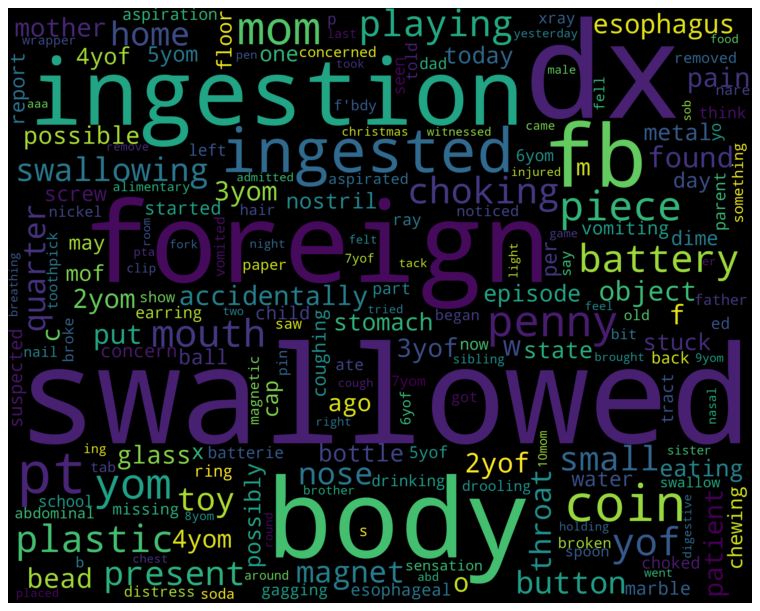

In [62]:
# make wordcloud of internal narratives with stop words removed  
internal_word_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42, collocations=False).generate(internal_words)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(internal_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
#ear
ear_df = allyears_fb[(allyears_fb["Body_Part"]==94)].reset_index()
#ear_df.head()
#how many? ear_df.shape

In [64]:
# join all ear narratives and get a count of words to start making a wordcloud also lower case them 
ear_words= " ".join(ear_df['Narrative']).lower()

# how many words?  
print ("There are {} words in the narratives relating to ear incidents.".format(len(ear_words.split(' '))))

There are 183007 words in the narratives relating to ear incidents.


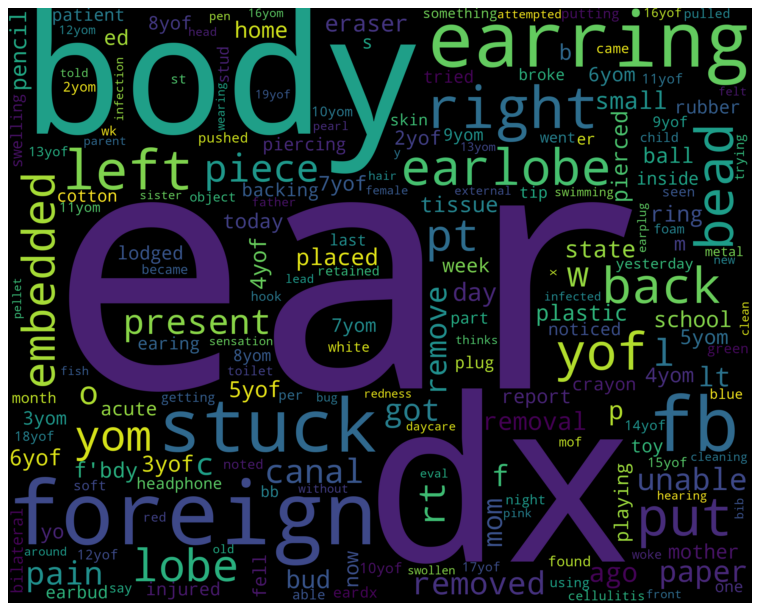

In [65]:
# make wordcloud of ear narratives with stop words removed  
ear_word_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42, collocations=False).generate(ear_words)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(ear_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
#face, including nose 
face_df = allyears_fb[(allyears_fb["Body_Part"]==76)].reset_index() 
#face_df.head()

In [67]:
# join all face narratives and get a count of words to start making a wordcloud also lower case them 
face_words= " ".join(face_df['Narrative']).lower()

# how many words?  
print ("There are {} words in the narratives relating to face incidents.".format(len(face_words.split(' '))))

There are 115302 words in the narratives relating to face incidents.


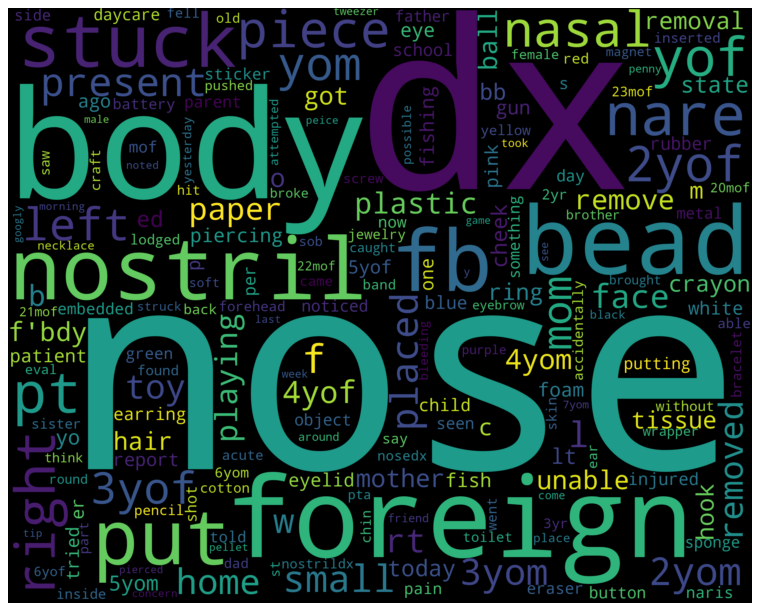

In [68]:
# make wordcloud of face narratives with stop words removed  
face_word_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42, collocations=False).generate(face_words)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(face_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [69]:
#eyeball
eyeball_df = allyears_fb[(allyears_fb["Body_Part_Name"]=='eyeball')].reset_index() 
eyeball_df.head()

index Treatment_Date   Age  Sex  Body_Part  Diagnosis  Disposition  \
0   8360     2017-06-15  28.0  2.0       77.0       56.0          1.0   
1  11271     2018-07-11  27.0  1.0       77.0       56.0          1.0   
2  11667     2018-09-24   2.0  2.0       77.0       56.0          1.0   
3  14020     2019-08-19   3.0  1.0       77.0       56.0          1.0   
4  20044     2021-10-18   3.0  1.0       77.0       56.0          1.0   

   Location  Fire_Involvement  Alcohol  Drug  \
0       4.0               0.0      NaN   NaN   
1       0.0               0.0      NaN   NaN   
2       1.0               0.0      NaN   NaN   
3       1.0               0.0      0.0   0.0   
4       0.0               0.0      0.0   0.0   

                                           Narrative  \
0  28YOF STS MONROE PIERCING BECAME LODGED WHEN S...   
1  27YOM HAS A FOREIGN BODY IN LEFT EYE FROM A "R...   
2  2YOF WITH A SMALL PLASTIC BEAD STUCK UNDER HER...   
3  3YOM PUT JEWELRY IN EYE FOR TREASUE AT HOME.  ...   
4             3 YOM WITH A SEQUIN IN EYE.  DX FB EYE   

                 Product Title Body_Part_Name  
0  Jewelry (excluding watches)        eyeball  
1  Jewelry (excluding watches)        eyeball  
2  Jewelry (excluding watches)        eyeball  
3  Jewelry (excluding watches)        eyeball  
4  Jewelry (excluding watches)        eyeball

In [70]:
# join all eyeball narratives and get a count of words to start making a wordcloud also lower case them 
eye_words= " ".join(eyeball_df['Narrative']).lower()

# how many words?  
print ("There are {} words in the narratives relating to eye incidents.".format(len(eye_words.split(' '))))

There are 75841 words in the narratives relating to eye incidents.


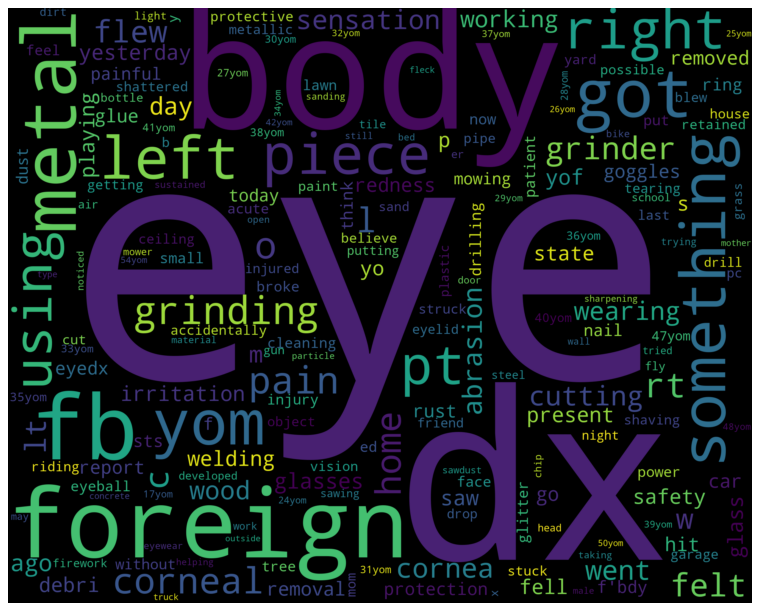

In [71]:
# make wordcloud of eyeball narratives with stop words removed  
eye_word_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42, collocations=False).generate(eye_words)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(eye_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
#lower trunk 
lower_trunk_df = allyears_fb[(allyears_fb["Body_Part"]==79)].reset_index()
#lower_trunk_df.head()

In [73]:
# join all lower trunk narratives and get a count of words to start making a wordcloud also lower case them 
lt_words= " ".join(lower_trunk_df['Narrative']).lower()

# how many words?  
print ("There are {} words in the narratives relating to lower trunk incidents.".format(len(lt_words.split(' '))))

There are 20935 words in the narratives relating to lower trunk incidents.


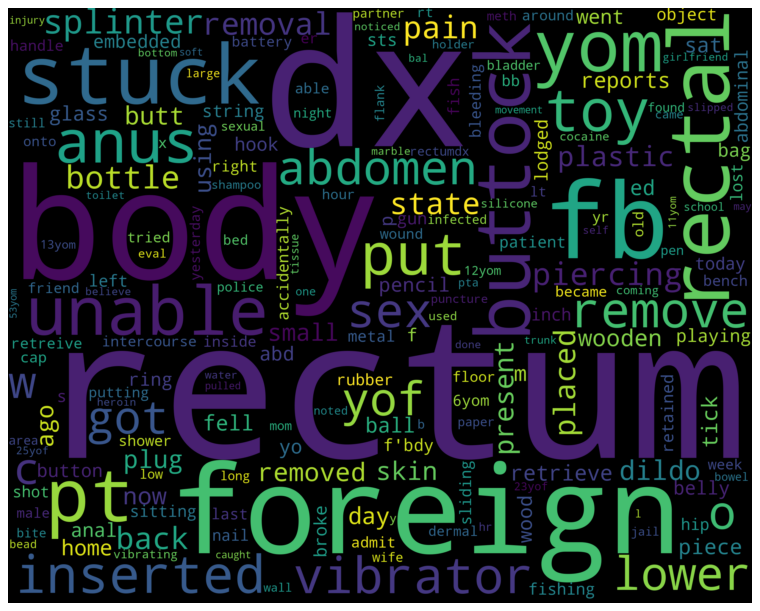

In [74]:
# make wordcloud of lower trunk narratives with stop words removed  
lt_word_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42, collocations=False).generate(lt_words)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(lt_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [75]:
#pubic region  
pubic_region_df = allyears_fb[(allyears_fb["Body_Part"]==38)].reset_index()
#pubic_region_df.head()

In [76]:
# join all pubic regions narratives and get a count of words to start making a wordcloud also lower case them 
pub_words= " ".join(pubic_region_df['Narrative']).lower()

# how many words?  
print ("There are {} words in the narratives relating to pubic region incidents.".format(len(pub_words.split(' '))))

There are 12175 words in the narratives relating to pubic region incidents.


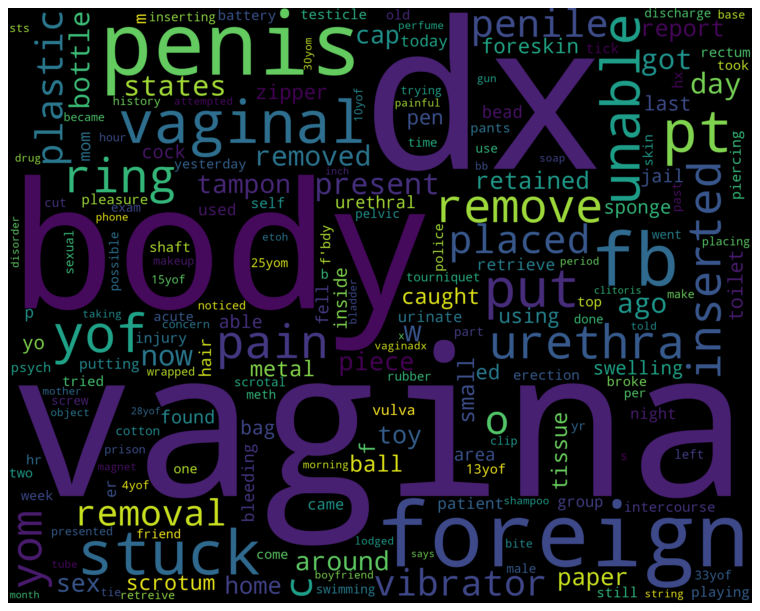

In [77]:
# make wordcloud of pubic region narratives with stop words removed  
pub_word_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42, collocations=False).generate(pub_words)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(pub_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [78]:
# join all narratives and get a count of words to start making a wordcloud also lower case them 
all_words= " ".join(allyears_fb['Narrative']).lower()

# how many words?  
print ("There are {} words in all narratives.".format(len(all_words.split(' '))))

There are 1001003 words in all narratives.


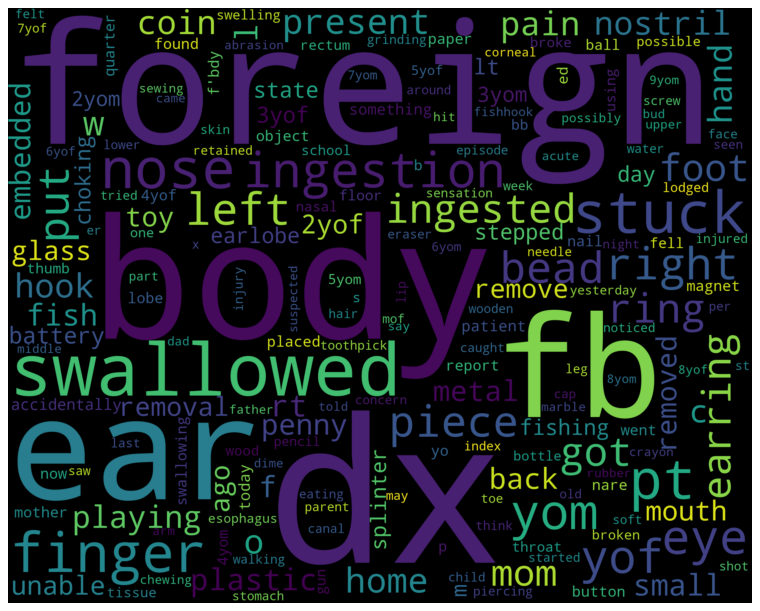

In [79]:
# make wordcloud of all narratives with stop words removed  
mega_word_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42, collocations=False).generate(all_words)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(mega_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()